In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
tendencia_precio = ctrl.Antecedent(np.arange(-10, 10.1, 0.1), 'tendencia_precio')
volumen = ctrl.Antecedent(np.arange(0, 1000, 1), 'volumen')
sent_mercado = ctrl.Antecedent(np.arange(0, 100, 1), 'sent_mercado')

In [4]:
precio_accion = ctrl.Consequent(np.arange(0, 5000, 1), 'precio_accion')

In [5]:
# Funciones de pertenencia
tendencia_precio['baja_fuerte'] = fuzz.trapmf(tendencia_precio.universe, [-10,-9,-2, 0])
tendencia_precio['estable'] = fuzz.trimf(tendencia_precio.universe, [-2, 0, 3])
tendencia_precio['sube_fuerte'] = fuzz.sigmoid(tendencia_precio.universe, 5, 5)
 
volumen['bajo'] = fuzz.trimf(volumen.universe, [0, 0, 500])
volumen['medio'] = fuzz.trimf(volumen.universe, [0, 500, 1000])
volumen['alto'] = fuzz.trimf(volumen.universe, [500, 1000, 1000])

sent_mercado['negativo'] = fuzz.trimf(sent_mercado.universe, [0, 0, 50])
sent_mercado['neutro'] = fuzz.trimf(sent_mercado.universe, [0, 50, 100])
sent_mercado['positivo'] = fuzz.trimf(sent_mercado.universe, [50, 100, 100])

precio_accion['bajo'] = fuzz.trimf(precio_accion.universe, [0, 0, 2500])
precio_accion['estable'] = fuzz.trimf(precio_accion.universe, [0, 2500, 5000])
precio_accion['sube'] = fuzz.trimf(precio_accion.universe, [2500, 5000, 5000])

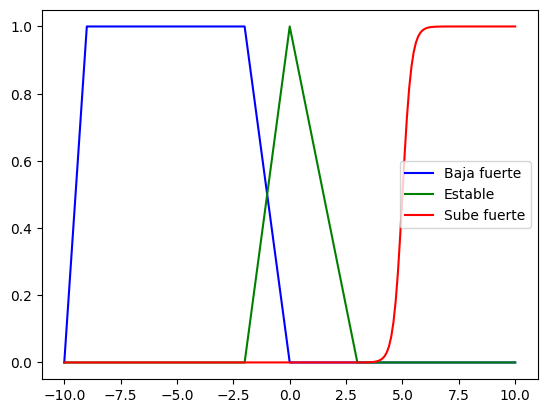

In [6]:
plt.plot(tendencia_precio.universe, tendencia_precio['baja_fuerte'].mf, 'b', linewidth=1.5, label='Baja fuerte')
plt.plot(tendencia_precio.universe, tendencia_precio['estable'].mf, 'g', linewidth=1.5, label='Estable')
plt.plot(tendencia_precio.universe, tendencia_precio['sube_fuerte'].mf, 'r', linewidth=1.5, label='Sube fuerte')
plt.legend()
plt.show()

In [7]:
rule1 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['bajo'] & sent_mercado['negativo'], precio_accion['bajo'])
rule2 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['bajo'] & sent_mercado['neutro'], precio_accion['bajo'])
rule3 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['bajo'] & sent_mercado['positivo'], precio_accion['bajo'])
rule4 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['medio'] & sent_mercado['negativo'], precio_accion['bajo'])
rule5 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['medio'] & sent_mercado['neutro'], precio_accion['estable'])
rule6 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['medio'] & sent_mercado['positivo'], precio_accion['estable'])
rule7 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['alto'] & sent_mercado['negativo'], precio_accion['estable'])
rule8 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['alto'] & sent_mercado['neutro'], precio_accion['sube'])
rule9 = ctrl.Rule(tendencia_precio['baja_fuerte'] & volumen['alto'] & sent_mercado['positivo'], precio_accion['sube'])
rule10 = ctrl.Rule(tendencia_precio['estable'] & volumen['bajo'] & sent_mercado['negativo'], precio_accion['bajo'])
rule11 = ctrl.Rule(tendencia_precio['estable'] & volumen['bajo'] & sent_mercado['neutro'], precio_accion['estable'])
rule12 = ctrl.Rule(tendencia_precio['estable'] & volumen['bajo'] & sent_mercado['positivo'], precio_accion['sube'])
rule13 = ctrl.Rule(tendencia_precio['estable'] & volumen['medio'] & sent_mercado['negativo'], precio_accion['estable'])
rule14 = ctrl.Rule(tendencia_precio['estable'] & volumen['medio'] & sent_mercado['neutro'], precio_accion['sube'])
rule15 = ctrl.Rule(tendencia_precio['estable'] & volumen['medio'] & sent_mercado['positivo'], precio_accion['sube'])
rule16 = ctrl.Rule(tendencia_precio['estable'] & volumen['alto'] & sent_mercado['negativo'], precio_accion['estable'])
rule17 = ctrl.Rule(tendencia_precio['estable'] & volumen['alto'] & sent_mercado['neutro'], precio_accion['sube'])
rule18 = ctrl.Rule(tendencia_precio['estable'] & volumen['alto'] & sent_mercado['positivo'], precio_accion['sube'])
rule19 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['bajo'] & sent_mercado['negativo'], precio_accion['estable'])
rule20 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['bajo'] & sent_mercado['neutro'], precio_accion['estable'])
rule21 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['bajo'] & sent_mercado['positivo'], precio_accion['sube'])
rule22 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['medio'] & sent_mercado['negativo'], precio_accion['sube'])
rule23 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['medio'] & sent_mercado['neutro'], precio_accion['sube'])
rule24 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['medio'] & sent_mercado['positivo'], precio_accion['sube'])
rule25 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['alto'] & sent_mercado['negativo'], precio_accion['sube'])
rule26 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['alto'] & sent_mercado['neutro'], precio_accion['sube'])
rule27 = ctrl.Rule(tendencia_precio['sube_fuerte'] & volumen['alto'] & sent_mercado['positivo'], precio_accion['sube'])


In [8]:
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27]

In [9]:
precio_accion_ctrl = ctrl.ControlSystem(rules)

In [10]:
mock_precio_accion = ctrl.ControlSystemSimulation(precio_accion_ctrl)

4096.680530540611


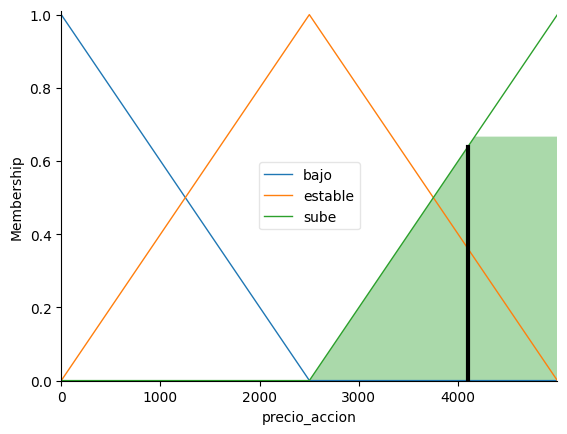

In [17]:
valor_tendencia_precio = 1
valor_volumen = 999
valor_sent_mercado = 100

mock_precio_accion.input['tendencia_precio'] = valor_tendencia_precio
mock_precio_accion.input['volumen'] = valor_volumen
mock_precio_accion.input['sent_mercado'] = valor_sent_mercado

mock_precio_accion.compute()

print(mock_precio_accion.output['precio_accion'])

precio_accion.view(sim=mock_precio_accion)

plt.show()
